___ 
# <span style="color:red">문제 1</span>
    - 유방암 결과를 분류하는 의사결정나무 모델을 만들고, predict method를 이용하여 목표변수 범주를 예측하라.
    - 그리고 모델의 정확도와 Confusion matrix를 구하라.
    - 데이터 : 유방암.csv(변수 : 31개, 자료 수 : 320개)
    - 목표변수 : diagnosis, 양성(108개), 음성(212개) 

## 문제풀이
    1. 데이터 구성하기
        - 불러오기
        - 결측치 확인 및 처리
        - 더미변수 생성
        - 데이터 분할(train(0.6), test(0.4))
    2. 모델 생성
    3. 모델 파라미터 조정
    4. 결론 도출

In [115]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd

# 데이터 시각화 패키지
import matplotlib.pyplot as plt
import matplotlib

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# GridSearchCV : 최적의 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# confusion matrix
from sklearn.metrics import confusion_matrix

# DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier

# RandomForestClassifier: 분류랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz

# graphviz import: 의사결정 나무 모델 시각화  .dot 확장자 파일 불러오는 패키지
import graphviz


from sklearn.metrics import accuracy_score, f1_score


from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')
# 나눔 고딕 적용
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc('axes', unicode_minus=False)

## 데이터 구성하기

In [116]:
# 데이터 불러오기
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/유방암.csv', encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [117]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [118]:
# drop: X변수외 변수 삭제
df_raw_x = df_raw.drop(["diagnosis"], axis = 1, inplace = False)

# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw_x)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [119]:
df_raw_y = df_raw["diagnosis"] 
df_x_dummy = pd.get_dummies(df_raw_x)

In [120]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


## 기본 옵션으로 모델 생성

In [121]:
dt_uncustomized = DecisionTreeClassifier(random_state=1234)
dt_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training : {:.3f}".format(dt_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(dt_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training : 1.000
Accuracy on test set : 0.883


## 모델 Parameter 조정 - Depth

In [122]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 6)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.852
1,2,0.979,0.875
2,3,0.995,0.875
3,4,1.000,0.883
4,5,1.000,0.883


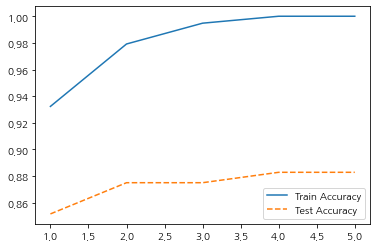

In [123]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

### 모델 Paramter 조정 - Depth 결과
- Depth 개수가 4개 일때, test 정확도가 가장 높았으므로 4로 설정한다.

## 모델 Paramter 조정 - Split

In [124]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 10 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.995,0.875
1,30,0.995,0.875
2,40,0.995,0.875
3,50,0.995,0.875
4,60,0.995,0.875
5,70,0.995,0.875
6,80,0.984,0.867
7,90,0.953,0.844
8,100,0.953,0.844
9,110,0.948,0.852


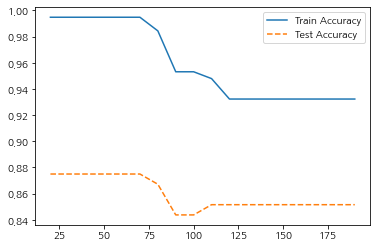

In [125]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

### 모델 Paramter 조정 - Split 결과
- Split 개수가 110개 일때, test 정확도가 가장 높았으므로 110로 설정한다.

## 모델 Paramter 조정 - Leaf 

In [126]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.995,0.875
1,4,0.974,0.859
2,6,0.964,0.859
3,8,0.958,0.898
4,10,0.953,0.914
5,12,0.943,0.906
6,14,0.932,0.852
7,16,0.932,0.852
8,18,0.932,0.852
9,20,0.932,0.852


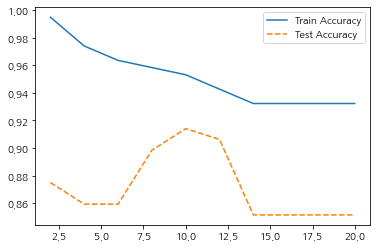

In [127]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

### 모델 Paramter 조정 - Leaf 결과
- Leaf 개수가 10개 일때, test 정확도가 가장 높았으므로 10로 설정한다.

## 채택한 파라미터로 모델 생성하기
- Depth : 4개
- Split : 110개
- Leaf : 10개

In [128]:
tree_final = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 10, min_samples_split=110, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=110,
                       random_state=1234)

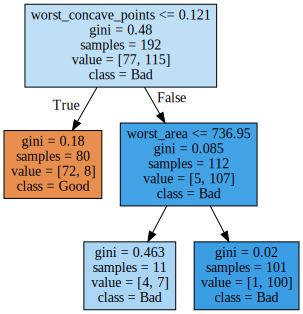

In [129]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_name, impurity = True, filled = True)

# tree_final.dot 그리기
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [130]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy on training set : {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set : 0.932
Accuracy on test set : 0.852
Confusion matrix: 
[[23  8]
 [11 86]]
              precision    recall  f1-score   support

          양성      0.676     0.742     0.708        31
          음성      0.915     0.887     0.901        97

    accuracy                          0.852       128
   macro avg      0.796     0.814     0.804       128
weighted avg      0.857     0.852     0.854       128



## 설명변수의 중요도

In [131]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
27,worst_concave_points,0.965
23,worst_area,0.035
0,mean_radius,0.000
1,mean_texture,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000
24,worst_smoothness,0.000
22,worst_perimeter,0.000
21,worst_texture,0.000


Text(0, 0.5, '설명변수')

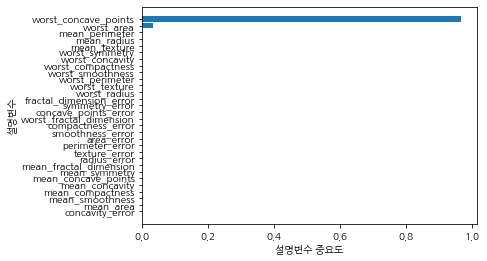

In [132]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### 설명변수에 대한 해석
- 생성한 모델의 정확도가 85.2% 라는 성과를 지니는 것을 보아 설명변수의 중요도를 나타내는 위 그래프는 설명력이 있다고 볼 수 없다.

In [103]:
estimator = DecisionTreeClassifier()

# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}

# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=50)

best parameter: 
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 50}

best score: 
0.932


## <span style="color:red">결론</span>
- "유방암" 데이터에 대해서 의사결정나무 모델을 생성하고, 범주를 예측해보았다.
- 우선, Hyper-parameter를 수정해나가며 모델의 정확도를 확인한 결과 다음과 같은 결과를 얻을 수 있었다.
    - 생성모델의 Train 데이터에 대한 정확도 : 93.2%
    - 생성모델의 Test 데이터에 대한 정확도 : 85.2%
- 반면에, Grid Search 방법을 통해 적절한 파라미터의 값을 통해 찾은 결과 다음과 같은 결과를 얻을 수 있었다.
    - Grid Search를 통해 찾은 정확도 : 93.2%
- 일일이 변경하며 도출한 하이퍼 파라미터보다 Grid Search를 통해 찾아낸 파라미터의 성능이 더 좋은 것을 알 수 있다.

___ 
# <span style="color:red">문제 2</span>
    - 유방암 결과를 분류하는 랜덤 포레스트 모델을 만들고, predict method를 이용하여 목표변수 범주를 예측하라.
    - 그리고 모델의 정확도와 Confusion matrix를 구하라.
    - 데이터 : 유방암.csv(변수 : 31개, 자료 수 : 320개)
    - 목표변수 : diagnosis, 양성(108개), 음성(212개) 

## 문제풀이
    1. 데이터 구성하기
        - 불러오기
        - 결측치 확인 및 처리
        - 더미변수 생성
        - 데이터 분할(train(0.6), test(0.4))
    2. 모델 생성
    3. 모델 파라미터 조정
    4. 결론 도출

In [133]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd

# 데이터 시각화 패키지
import matplotlib.pyplot as plt
import matplotlib

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# GridSearchCV : 최적의 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# confusion matrix
from sklearn.metrics import confusion_matrix

# DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier

# RandomForestClassifier: 분류랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz

# graphviz import: 의사결정 나무 모델 시각화  .dot 확장자 파일 불러오는 패키지
import graphviz


from sklearn.metrics import accuracy_score, f1_score


from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')
# 나눔 고딕 적용
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc('axes', unicode_minus=False)

## 데이터 구성하기

In [39]:
# 데이터 불러오기
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/유방암.csv', encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [40]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [41]:
# drop: X변수외 변수 삭제
df_raw_x = df_raw.drop(["diagnosis"], axis = 1, inplace = False)

# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw_x)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [42]:
df_raw_y = df_raw["diagnosis"] 
df_x_dummy = pd.get_dummies(df_raw_x)

In [43]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


## 기본 옵션으로 모델 생성
- 기본옵션으로 생성된 모델은 train score가 1이고 test score가 91.4%를 보이므로 Overfitting 됐음을 알 수 있다.

In [44]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training : 1.000
Accuracy on test set : 0.914


## 모델 Parameter 조정 - tree
- tree(모델)의 개수 조정

In [45]:
train_accuracy = []
test_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 12)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.995,0.906
1,20,1.000,0.914
2,30,1.000,0.906
3,40,1.000,0.906
4,50,1.000,0.922
5,60,1.000,0.922
6,70,1.000,0.914
7,80,1.000,0.914
8,90,1.000,0.922
9,100,1.000,0.914


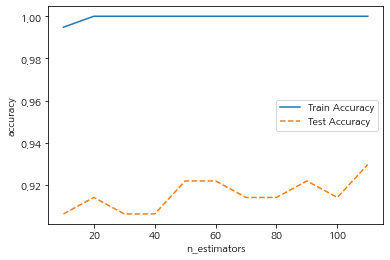

In [46]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label="Test Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()

### 모델 Parameter 조정 - tree 결과
- Estimator의 개수가 110개 일때, test 정확도가 가장 높았으므로 110으로 설정한다.

In [47]:
oob_error = []

for v_n_estimator in range(1, 151):
    rf = RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

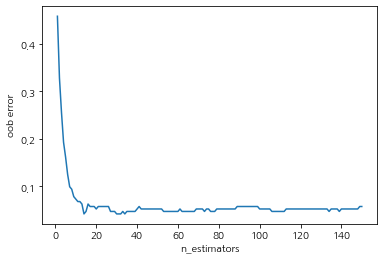

In [48]:
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")
n_estimators = 110

## 모델 Parameter 조정 - depth
- 최대 depth 개수 조정

In [49]:
train_accuracy = []
test_accuracy = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth=v_max_depth, n_estimators = 110, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.948,0.914
1,2,0.974,0.906
2,3,0.990,0.914
3,4,1.000,0.922
4,5,1.000,0.922
5,6,1.000,0.930
6,7,1.000,0.930
7,8,1.000,0.930
8,9,1.000,0.930
9,10,1.000,0.930


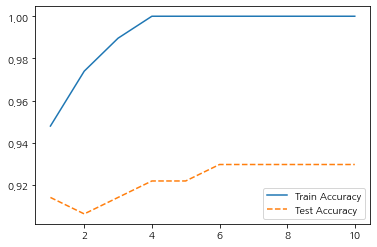

In [50]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()
max_depth = 6

### 모델 Parameter 조정 - depth 결과
- depth의 개수가 6개 일때, test 정확도가 가장 높았으므로 6으로 설정한다.

## 모델 Parameter 조정 - split
- split(최대 자료 수)의 개수 조정

In [51]:
train_accuracy = []
test_accuracy = []

para_split = [n_split * 10 for n_split in range(1, 20)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split=v_min_samples_split, max_depth=4, n_estimators = 100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.990,0.914
1,20,0.984,0.906
2,30,0.979,0.906
3,40,0.979,0.906
4,50,0.979,0.906
5,60,0.953,0.891
6,70,0.953,0.898
7,80,0.953,0.922
8,90,0.953,0.922
9,100,0.953,0.922


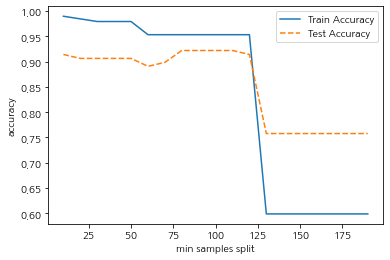

In [52]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split")
plt.ylabel("accuracy")
plt.legend()

### 모델 Parameter 조정 - split 결과
- split의 개수가 80개 일때, test 정확도가 가장 높았으므로 80으로 설정한다.

## 모델 Parameter 조정 - leaf
- leaf(잎사귀 노드)의 개수 조정

In [53]:
train_accuracy = []
test_accuracy = []

para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf=v_min_samples_leaf, max_depth=4, n_estimators = 100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesLeaf"] = para_leaf
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

df_accuracy_split.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.969,0.906
1,20,0.958,0.914
2,30,0.953,0.898
3,40,0.953,0.922
4,50,0.964,0.914
5,60,0.943,0.922
6,70,0.599,0.758
7,80,0.599,0.758
8,90,0.599,0.758
9,100,0.599,0.758


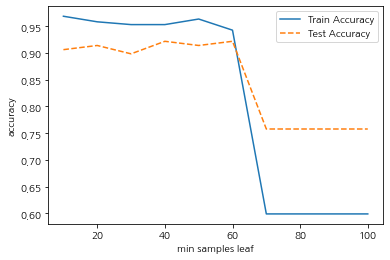

In [54]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf")
plt.ylabel("accuracy")
plt.legend()

### 모델 Parameter 조정 - leaf 결과
- Leaf 개수가 40개 일때, test 정확도가 가장 높았으므로 40으로 설정한다.

## 채택한 파라미터로 모델 생성하기
- Tree : 110개
- Depth : 6개
- Estimators : 110개
- Split : 80개
- Leaf : 40개

In [55]:
rf_final = RandomForestClassifier(min_samples_leaf=40, max_depth=6, n_estimators = 110, min_samples_split=80, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set : 0.948
Accuracy on test set : 0.906
Confusion matrix : 
[[25  6]
 [ 6 91]]
              precision    recall  f1-score   support

          양성      0.806     0.806     0.806        31
          음성      0.938     0.938     0.938        97

    accuracy                          0.906       128
   macro avg      0.872     0.872     0.872       128
weighted avg      0.906     0.906     0.906       128



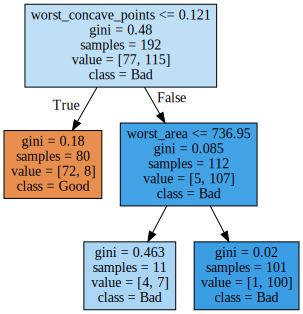

In [105]:
# rf_final.dot으로 결과 저장
export_graphviz(tree_final, out_file="rf_final.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_name, impurity = True, filled = True)

# rf_final.dot 그리기
with open("rf_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [57]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
22,worst_perimeter,0.165
7,mean_concave_points,0.156
27,worst_concave_points,0.128
6,mean_concavity,0.127
20,worst_radius,0.091
23,worst_area,0.073
2,mean_perimeter,0.064
26,worst_concavity,0.063
0,mean_radius,0.036
3,mean_area,0.036


## 설명변수의 중요도

Text(0, 0.5, '설명변수')

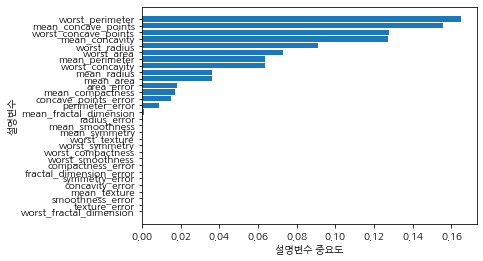

In [58]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### 설명변수에 대한 해석
- 생성한 모델의 정확도가 90.6% 라는 성과를 지니는 것을 보아 설명변수의 중요도를 나타내는 위 그래프는 설명력이 있다고 볼 수 있다.
- 우선 제일 상단에 분포되어있는 'concave'와 같은 특성을 지닌 변수들을 통해, 오목함의 정도가 유방암에 미치는 영향이 크다는 것을 유추할 수 있다.

In [59]:
estimator = RandomForestClassifier(n_estimators=100, random_state=1234)
param_grid = {"max_depth":para_depth, "min_samples_leaf":para_leaf}
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)
print("best estimator model : \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter : \n{}".format(grid_rf.best_params_))
print("\nbest score : \n{}".format(grid_rf.best_score_.round(3)))

best estimator model : 
RandomForestClassifier(max_depth=1, min_samples_leaf=30, random_state=1234)

best parameter : 
{'max_depth': 1, 'min_samples_leaf': 30}

best score : 
0.943


## <span style="color:red">결론</span>
- "유방암" 데이터에 대해서 랜덤 포레스트 모델을 생성하고, 범주를 예측해보았다.
- 우선, Hyper-parameter를 수정해나가며 모델의 정확도를 확인한 결과 다음과 같은 결과를 얻을 수 있었다.
    - 생성모델의 Train 데이터에 대한 정확도 : 94.8%
    - 생성모델의 Test 데이터에 대한 정확도 : 90.6%
- 반면에, Grid Search 방법을 통해 적절한 파라미터의 값을 통해 찾은 결과 다음과 같은 결과를 얻을 수 있었다.
    - Grid Search를 통해 찾은 정확도 : 94.3%
- 일일이 변경하며 도출한 하이퍼 파라미터보다 Grid Search를 통해 찾아낸 파라미터의 성능이 더 좋은 것을 알 수 있지만.
  생성한 모델의 정확도도 높기에 해당 모델은 설명력이 있다고 말할 수 있다.